In [10]:
import numpy as np
import string
import nltk
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD

In [2]:
lem = WordNetLemmatizer()
titles = [lines.rstrip() for lines in open('all_book_titles.txt')]
stopwords = set(w.rstrip() for w in open('stopwords.txt'))

In [3]:
stopwords = stopwords.union({'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth',})

In [4]:
def my_tokenizer(s):
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t)>2]
    tokens = [lem.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
    return tokens

In [5]:
word_index_map = {}
all_titles = []
current_index = 0
all_tokens = []
index_word_map = []
error_count = 0
for title in titles:
    try:
        title = title.encode('ascii', 'igonre').decode('utf-8')
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1
                index_word_map.append(token)
    except Exception as e:
        print(e)
        print(title)
        error_count += 1

unknown error handler name 'igonre'
Carlos Aldama's Life in Batá : Cuba, Diaspora, and the Drum
unknown error handler name 'igonre'
Chemistry : The Central Science with MasteringChemistry®
unknown error handler name 'igonre'
Microeconomic Theory : Basic Principles and Extensions (with Economic Applications, InfoTracï¿½ Printed Access Card)


In [6]:
print('No. of errors :', error_count, 'No. of lines in the file :', len(titles))
if error_count==len(titles):
    print('There is no data to do anything. Quiting!!!!')
    exit()

No. of errors : 3 No. of lines in the file : 2373


In [8]:
def token_to_vector(token):
    x = np.zeros(len(word_index_map))
    for t in token:
        i = word_index_map[t]
        x[i] += 1
    return x

In [9]:
N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D, N))
i = 0
for token in all_tokens:
    X[:,i] = token_to_vector(token)
    i += 1

In [11]:
def main():
    svd = TruncatedSVD()
    z = svd.fit_transform(X)
    plt.scatter(z[:,0], z[:,1])
    for i in range(D):
        plt.annotate(index_word_map[i], xy = (z[i,0], z[i,1]))
    plt.show()

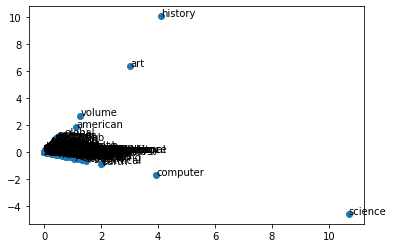

In [12]:
main()